## Paired plots 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import stats

In [45]:
data = pd.read_csv('../results/pair_experiment.csv')

In [46]:
#do_floor, beta = True, 1.1
do_floor, beta = False, 1.05
data = data[(data['beta'] == beta) & (data['do_floor'] == do_floor)]

In [47]:
len(data)

300

In [48]:
data

,target_epsilon,target_delta,beta,do_floor,game_id,size_of_game,num_discard_cards,hand_p1,hand_p2,v_inf,v_1_inf,emp_sample_complexity,emp_simulation_complexity
300,0.01,0.05,1.05,False,3ff44312-6919-4df9-a2a3-41823f4bd307,100,2,"['H2', 'C5', 'D6', 'C7', 'D14']","['D2', 'S9', 'C11', 'S13', 'H14']",0.947649,75.145833,260598,20784174
301,0.01,0.05,1.05,False,3ff44312-6919-4df9-a2a3-41823f4bd307,100,3,"['H2', 'C5', 'D6', 'C7', 'D14']","['D2', 'S9', 'C11', 'S13', 'H14']",0.923847,74.153008,248189,20441852
302,0.01,0.05,1.05,False,945d02af-fff9-4ab0-9d7c-7d0000139546,100,2,"['H4', 'H7', 'H9', 'S10', 'H14']","['C4', 'C7', 'S11', 'C12', 'D14']",0.890432,66.537303,248189,18557956
303,0.01,0.05,1.05,False,945d02af-fff9-4ab0-9d7c-7d0000139546,100,3,"['H4', 'H7', 'H9', 'S10', 'H14']","['C4', 'C7', 'S11', 'C12', 'D14']",0.915758,66.369322,248189,18518219
304,0.01,0.05,1.05,False,a0a0388a-b6e6-48b9-999d-a22c35f911c1,100,2,"['C4', 'S5', 'S6', 'S8', 'H14']","['H3', 'D5', 'S10', 'H11', 'C13']",0.949753,83.894378,260598,23179173
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.01,0.05,1.05,False,182aff49-314e-4449-b440-32a869f240c4,100,3,"['S2', 'S3', 'S7', 'C10', 'D13']","['H3', 'S5', 'D5', 'D6', 'D11']",0.907262,73.437803,248189,20389420
596,0.01,0.05,1.05,False,32c27291-4280-4a19-8bb2-01fa35dfdd9c,100,2,"['C3', 'S8', 'S11', 'H12', 'C12']","['C2', 'S5', 'C9', 'H10', 'D10']",0.890432,61.039825,248189,16997894
597,0.01,0.05,1.05,False,32c27291-4280-4a19-8bb2-01fa35dfdd9c,100,3,"['C3', 'S8', 'S11', 'H12', 'C12']","['C2', 'S5', 'C9', 'H10', 'D10']",0.903402,72.692166,248189,20153601
598,0.01,0.05,1.05,False,f229c2e2-36c1-4feb-be2f-842ea039ee2f,100,2,"['S2', 'D2', 'D9', 'C12', 'C13']","['C4', 'C6', 'S8', 'C9', 'S12']",0.925505,75.500227,260598,20954765


In [49]:
data.nunique()

target_epsilon                 1
target_delta                   1
beta                           1
do_floor                       1
game_id                      150
size_of_game                   1
num_discard_cards              2
hand_p1                      150
hand_p2                      150
v_inf                        180
v_1_inf                      300
emp_sample_complexity          7
emp_simulation_complexity    300
dtype: int64

In [50]:
discard_2 = data[data['num_discard_cards'] == 2]
discard_3 = data[data['num_discard_cards'] == 3]

In [51]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev * 0.5

In [52]:
# Copy paste from https://stackoverflow.com/questions/25750170/show-decimal-places-and-scientific-notation-on-the-axis-of-a-matplotlib-plot
class MathTextSciFormatter(mtick.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt

    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = "."
        positive_sign = "+"
        tup = s.split("e")
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, "")
        exponent = tup[1][1:].lstrip("0")
        if exponent:
            exponent = "10^{%s%s}" % (sign, exponent)
        if significand and exponent:
            s = r"%s{\times}%s" % (significand, exponent)
        else:
            s = r"%s%s" % (significand, exponent)
        return "${}$".format(s)

In [53]:
def pair_expt_plot_save(ax, plot_stat, beta, do_floor, do_jitter = True):
    
    axis_titles = {
    'emp_sample_complexity': 'empirical sample complexity', 
    'emp_simulation_complexity': 'empirical query complexity', 
    }
    
    ax.set_title(f'Paired experiment, {axis_titles[plot_stat]}. \n {len(discard_3)} games, beta = {beta}, do_floor = {do_floor}.')
    ax.set_xlabel(f'Discard 2 \n {axis_titles[plot_stat]}')
    ax.set_ylabel(f'Discard 3 \n {axis_titles[plot_stat]}')

    x = discard_2[plot_stat]
    y = rand_jitter(discard_3[plot_stat]) if do_jitter else discard_3[plot_stat]
    ax.scatter(
        x,
        y,
        s=10,
        marker=".",
        alpha=0.5,
        linewidth=0
    )
    #min_min = min(min(x), min(y)) - (1000000 if plot_stat == 'emp_simulation_complexity' else 10000)
    min_min=0
    max_max = max(max(x), max(y)) + (1000000 if plot_stat == 'emp_simulation_complexity' else 10000)
    ax.set_xlim(min_min, max_max)
    ax.set_ylim(min_min, max_max)
    ax.xaxis.set_major_formatter(MathTextSciFormatter("%1.0e"))
    ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.1e"))

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)



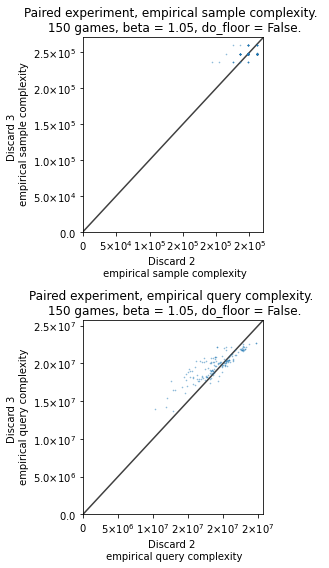

In [54]:
exp_fig, (exp_ax1, exp_ax2) = plt.subplots(2, 1)
exp_fig.set_size_inches(4, 8)

pair_expt_plot_save(ax = exp_ax1, plot_stat = 'emp_sample_complexity', beta= beta, do_floor = do_floor)
pair_expt_plot_save(ax = exp_ax2, plot_stat = 'emp_simulation_complexity', beta= beta, do_floor = do_floor, do_jitter=False)

plt.tight_layout()
plt.savefig(
    f"../plots/paired_texp_beta_{beta}.pdf",
    bbox_inches="tight",
    format="PDF",
    transparent=True,
)

### Compute the number of points on / above / below the line y=x 

In [55]:
points = pd.DataFrame([[x, y] for x, y in zip(discard_2['emp_sample_complexity'], discard_3['emp_sample_complexity'])],
            columns=['dis_2', 'dis_3'])

In [56]:
points['on_line_x_y'] = points['dis_2'] == points['dis_3']
points['below_line_x_y'] = points['dis_2'] > points['dis_3']
points['above_line_x_y'] = points['dis_2'] < points['dis_3']
summary = points[['on_line_x_y', 'below_line_x_y', 'above_line_x_y']].sum()
assert summary['on_line_x_y'] + summary['below_line_x_y'] + summary['above_line_x_y'] == len(data)/2
print(f"Beta = {beta}")

slope, intercept, r_value, p_value, std_err = stats.linregress(points['dis_2'], points['dis_3'])
print(f" slope = {slope},\n intercept = {intercept},\n r_value = {r_value},\n p_value = {p_value},\n std_err = {std_err}")

summary

Beta = 1.05
 slope = 0.14976934685807844,
 intercept = 211621.56127292957,
 r_value = 0.3018707528613098,
 p_value = 0.00017390660817842175,
 std_err = 0.03887969879804956


on_line_x_y       67
below_line_x_y    48
above_line_x_y    35
dtype: int64

In [57]:
"""
Beta = 1.05
on_line_x_y       67
below_line_x_y    48
above_line_x_y    35

Beta = 1.1
on_line_x_y       112
below_line_x_y     31
above_line_x_y      7
"""


'\nBeta = 1.05\non_line_x_y       67\nbelow_line_x_y    48\nabove_line_x_y    35\n\nBeta = 1.1\non_line_x_y       112\nbelow_line_x_y     31\nabove_line_x_y      7\n'